# Orthogonality of R7 and R7' microvilli
WORK IN PROGRESS
Compare microvilli angular measurements for R7 and R7'
- NOTE: this was written for the data AM sent in April 2020: this spreadsheet only included R7 and R7', and lacked the z index in which each measurement was taken
- Replaced by notebook written for the new excel file AM sent in August 2020 that includes measurements for all photoreceptors along with the z index each measurement was taken

In [62]:
import numpy as np
import pandas as pd
import os.path
import matplotlib.pyplot as plt

import sys
from cx_analysis.utils import index_by_om
from vis.hex_lattice import hexplot
from vis.fig_tools import linear_cmap

In [63]:
# import raw data from excel files
r7df = pd.read_excel('~/Data/microvilli angel.xlsx', sheet_name="R7_raw", index_col=0)
r7pdf = pd.read_excel('~/Data/microvilli angel.xlsx', sheet_name="R7'_raw", index_col=0)

tp = '200507'
data_dir = f'~/Data/{tp}_lamina'
cxdf = pd.read_pickle(os.path.join(os.path.expanduser(data_dir), f'{tp}_cxdf.pickle'))
widedf = index_by_om(cxdf)

r7_inputs = widedf.filter(regex='->R7$').sum(axis=1)
r7p_inputs = widedf.filter(regex='->R7p$').sum(axis=1)

dra_om = ['A4', 'A5', 'B5', 'B6', 'C5', 'C6', 'D6', 'D7', 'E6', 'E7']
dra_om = ['A5', 'B5', 'B6', 'C6', 'D6', 'D7', 'E7']
ndra_om = [str(o) for o in r7df.columns if o not in dra_om]

Text(0.5,1,"Average angular difference between R7 and R7'")

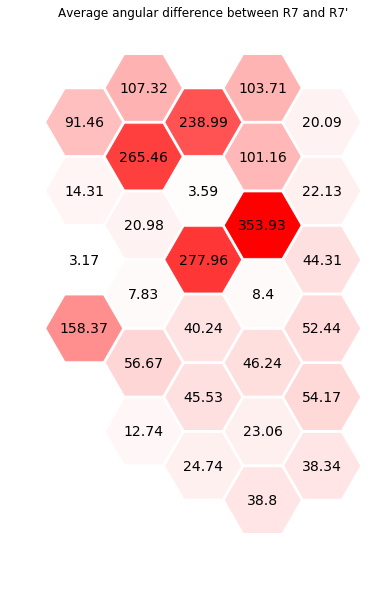

In [81]:
fig, ax = plt.subplots(1, figsize=[12, 10])

diff = r7pdf - r7df
mn_diff = diff.mean(axis=0).abs()
cm = linear_cmap(n_vals=100, max_colour='r')
max_val = mn_diff.max()


node_data = {}
for om, val in mn_diff.items():
    node_data[om] = {'colour': cm(val/max_val),
                    'label': np.round(val, decimals=2)}
   
hexplot(node_data, ax=ax)
ax.set_title("Average angular difference between R7 and R7'")

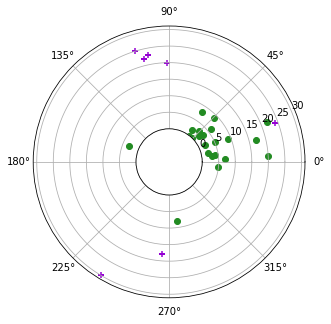

In [80]:
diff_radians = mn_diff/180.0 * np.pi
cx_ratio = 2 * abs(r7_inputs-r7p_inputs)/(r7_inputs + r7p_inputs)
cx_ratio = cx_ratio.reindex(diff_radians.index)

fig = plt.figure(figsize=[5, 5])
ax = fig.add_subplot(111, projection='polar')

ax.scatter(diff_radians.loc[dra_om], r7_inputs.loc[dra_om], marker='+', c='darkviolet')
ax.scatter(diff_radians.loc[ndra_om], r7_inputs.loc[ndra_om], marker='o', c='forestgreen')

ax.set_rorigin(-10)

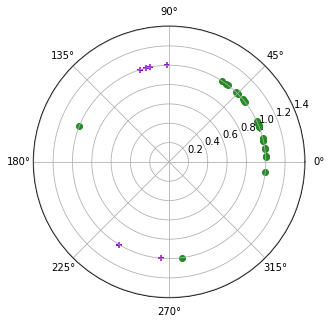

In [68]:
diff_radians = mn_diff/180.0 * np.pi
cx_ratio = 2 * abs(r7_inputs-r7p_inputs)/(r7_inputs + r7p_inputs)
cx_ratio = cx_ratio.reindex(diff_radians.index)

fig = plt.figure(figsize=[5, 5])
ax = fig.add_subplot(111, projection='polar')

ax.scatter(diff_radians.loc[dra_om], np.ones(len(dra_om)), marker='+', c='darkviolet')
ax.scatter(diff_radians.loc[ndra_om], np.ones(len(ndra_om)), marker='o', c='forestgreen')